In [1]:
# Loading all necessary library

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from google.colab import files
import io

In [2]:
# Loading the dataset

uploaded = files.upload()


Saving retail_data.csv to retail_data.csv


In [3]:
df = pd.read_csv(io.BytesIO(uploaded['retail_data.csv']), encoding= 'ISO-8859-1')

In [4]:
df.head()

,CustomerID,Age,Gender,AnnualIncome,SpendingScore,ProductCategory,ProductPrice,PurchaseDate,StoreID,StoreLocation,PaymentMethod,DiscountApplied,DiscountPercent,ProductCost,Profit,FootTraffic,InventoryLevel,MarketingExpenditure,CompetitorPrice
0,1,58,Male,60038,41,Health & Beauty,147.43,2022-06-11,46,San Jose,Credit Card,True,26,109.10,38.33,336,26,9107.90,171.55
1,2,57,Male,31577,91,Health & Beauty,402.09,2023-06-05,53,Los Angeles,Mobile Payment,True,1,398.07,4.02,491,32,1746.77,419.19
2,3,39,Female,117404,26,Groceries,958.45,2020-10-14,95,Philadelphia,Mobile Payment,False,0,958.45,0.00,157,3,2030.49,835.92
3,4,33,Male,87434,94,Electronics,544.17,2021-08-27,24,Dallas,Credit Card,False,0,544.17,0.00,223,87,6242.68,620.36
4,5,18,Male,90225,10,Health & Beauty,645.75,2023-06-06,2,San Antonio,Credit Card,False,0,645.75,0.00,315,8,6008.89,600.49


In [5]:
df.shape

(200000, 19)

In [6]:
df.columns

Index(['CustomerID', 'Age', 'Gender', 'AnnualIncome', 'SpendingScore',
       'ProductCategory', 'ProductPrice', 'PurchaseDate', 'StoreID',
       'StoreLocation', 'PaymentMethod', 'DiscountApplied', 'DiscountPercent',
       'ProductCost', 'Profit', 'FootTraffic', 'InventoryLevel',
       'MarketingExpenditure', 'CompetitorPrice'],
      dtype='object')

In [8]:
df.describe()

,CustomerID,Age,AnnualIncome,SpendingScore,ProductPrice,StoreID,DiscountPercent,ProductCost,Profit,FootTraffic,InventoryLevel,MarketingExpenditure,CompetitorPrice
count,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.00000,200000.000000,200000.000000
mean,100000.500000,43.969475,85058.438785,50.417900,504.591928,50.418075,7.484810,466.868615,37.723312,524.944335,49.94360,5038.608535,504.746194
std,57735.171256,15.277401,37511.311914,28.864392,286.427125,28.835288,9.803708,271.084205,60.786853,274.168526,29.12104,2857.425697,294.172524
min,1.000000,18.000000,20001.000000,1.000000,10.000000,1.000000,0.000000,7.210000,0.000000,50.000000,0.00000,100.090000,8.120000
25%,50000.750000,31.000000,52577.000000,25.000000,255.730000,25.000000,0.000000,233.490000,0.000000,288.000000,25.00000,2568.380000,252.460000
50%,100000.500000,44.000000,85184.500000,50.000000,504.675000,50.000000,0.000000,461.105000,0.000000,524.000000,50.00000,5033.750000,498.025000
75%,150000.250000,57.000000,117460.250000,75.000000,752.740000,75.000000,15.000000,688.650000,55.832500,762.000000,75.00000,7508.137500,744.020000
max,200000.000000,70.000000,150000.000000,100.000000,1000.000000,100.000000,30.000000,1000.000000,299.870000,1000.000000,100.00000,9999.980000,1197.140000


**Data Cleaning**

Before the start of the cleaning process, the dataset is examined to investigate the common areas that may require attention. This process would help determine how clean the data is the steps that would be deed necessary and unnecessary.

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200000 entries, 0 to 199999
Data columns (total 19 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   CustomerID            200000 non-null  int64  
 1   Age                   200000 non-null  int64  
 2   Gender                200000 non-null  object 
 3   AnnualIncome          200000 non-null  int64  
 4   SpendingScore         200000 non-null  int64  
 5   ProductCategory       200000 non-null  object 
 6   ProductPrice          200000 non-null  float64
 7   PurchaseDate          200000 non-null  object 
 8   StoreID               200000 non-null  int64  
 9   StoreLocation         200000 non-null  object 
 10  PaymentMethod         200000 non-null  object 
 11  DiscountApplied       200000 non-null  bool   
 12  DiscountPercent       200000 non-null  int64  
 13  ProductCost           200000 non-null  float64
 14  Profit                200000 non-null  float64
 15  

In [9]:
# Check the missing values

df.isna().sum()

CustomerID              0
Age                     0
Gender                  0
AnnualIncome            0
SpendingScore           0
ProductCategory         0
ProductPrice            0
PurchaseDate            0
StoreID                 0
StoreLocation           0
PaymentMethod           0
DiscountApplied         0
DiscountPercent         0
ProductCost             0
Profit                  0
FootTraffic             0
InventoryLevel          0
MarketingExpenditure    0
CompetitorPrice         0
dtype: int64

In [10]:
df.isnull().sum()

CustomerID              0
Age                     0
Gender                  0
AnnualIncome            0
SpendingScore           0
ProductCategory         0
ProductPrice            0
PurchaseDate            0
StoreID                 0
StoreLocation           0
PaymentMethod           0
DiscountApplied         0
DiscountPercent         0
ProductCost             0
Profit                  0
FootTraffic             0
InventoryLevel          0
MarketingExpenditure    0
CompetitorPrice         0
dtype: int64

From the steps above, it can be observed that this dataset can be classified to be relatively clean. Since there are no missing values, then we can proceed to explore the relationships between the columns in the dataset.

 Exploratory Data Analysis (EDA)

In [11]:
df['ProductCategory'].unique()

array(['Health & Beauty', 'Groceries', 'Electronics', 'Books',
       'Home & Kitchen', 'Clothing'], dtype=object)

In [12]:
for column in df.columns:
  unique_columns = df[column].unique()
  print(f'Unique values in the column "{column}": {unique_columns}')


Unique values in the column "CustomerID": [     1      2      3 ... 199998 199999 200000]
Unique values in the column "Age": [58 57 39 33 18 27 19 70 23 32 55 38 31 28 30 45 47 67 21 69 52 40 41 63
 59 56 49 36 64 26 68 43 62 22 24 25 53 51 61 35 54 65 29 48 34 20 37 50
 42 44 46 60 66]
Unique values in the column "Gender": ['Male' 'Female']
Unique values in the column "AnnualIncome": [ 60038  31577 117404 ...  45118  58127  47549]
Unique values in the column "SpendingScore": [ 41  91  26  94  10  74  77   7  62  45  47  65  24  43  21  13  20  93
  58   8  48  32  14  96  28  68   1  80  60  75  97  19  15  56  53  11
  64   4   6  61  22  55  82  31  30  73  37  76  35  83  25  12  38  36
  39  51  18  52  16 100  46  44  92   5  34  59  63  79  98  50  33   3
   9  99  88  69  27  70  42  54  89  17  40  67  66  29  86  87  78   2
  81  49  23  84  95  85  57  90  71  72]
Unique values in the column "ProductCategory": ['Health & Beauty' 'Groceries' 'Electronics' 'Books' 'Home & Kitc

In [13]:
# To find the total number of stores represented in the dataset

len(df['StoreID'].unique())

100

In [14]:
# Check the performance of the categories

df['ProductCategory'].astype('category').value_counts().sort_values()

ProductCategory
Health & Beauty    33172
Home & Kitchen     33239
Clothing           33348
Electronics        33380
Groceries          33382
Books              33479
Name: count, dtype: int64

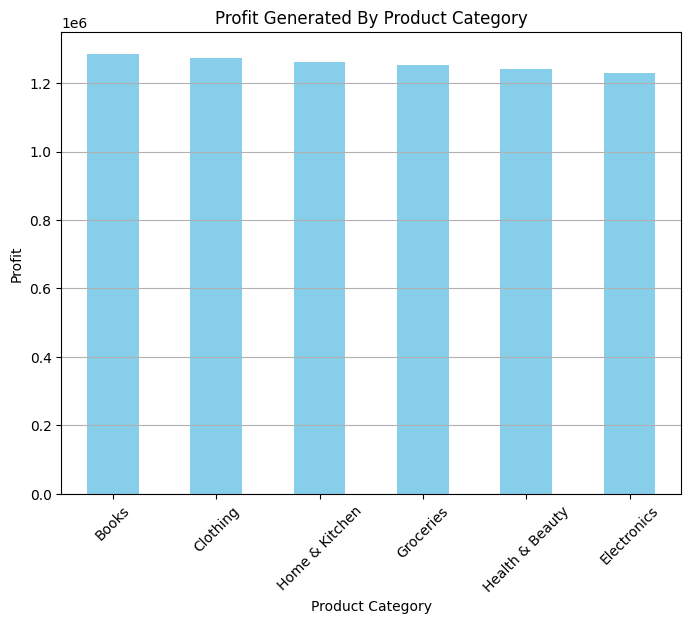

In [50]:
# Group the data by 'Product Category' and calculate the profit for each category

sum_of_Category = df.groupby('ProductCategory')['Profit'].sum()
sorted_Category = sum_of_Category.sort_values(ascending=False)

plt.figure(figsize=(8, 6))
sorted_Category.plot(kind='bar', color='skyblue')
plt.title('Profit Generated By Product Category')
plt.xlabel('Product Category')
plt.ylabel('Profit')
plt.xticks(rotation=45)
plt.grid(axis='y')
plt.show()

The plot above suggests that the difference in profit generated by the various product categories is not particularly significant.

In [17]:
# Sales performance by store location

store_sales = df.groupby('StoreLocation')['Profit'].sum()
store_sales.sort_values()

StoreLocation
San Antonio     736496.36
Philadelphia    739966.76
New York        744609.20
Chicago         750098.08
Dallas          752219.99
Los Angeles     757148.14
San Jose        760443.48
San Diego       761954.99
Houston         769112.95
Phoenix         772612.49
Name: Profit, dtype: float64

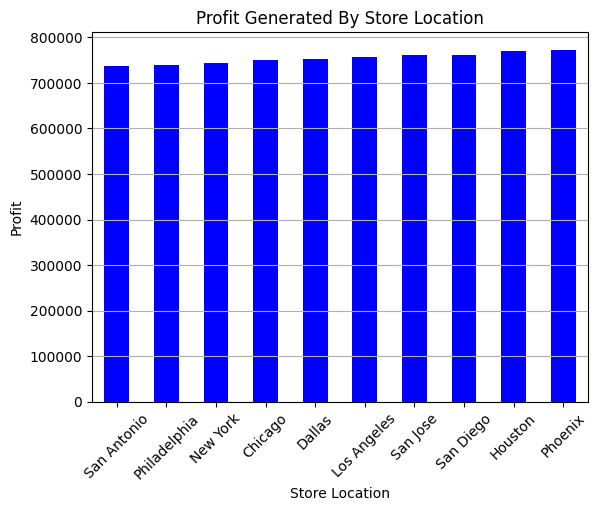

In [49]:
store_sales.sort_values().plot(kind='bar', color='blue')
plt.title('Profit Generated By Store Location')
plt.xlabel('Store Location')
plt.ylabel('Profit')
plt.xticks(rotation=45)
plt.grid(axis='y')
plt.show()

From the plot above, it can be observed that all store locations generated over 700,000 in profit. However, San Antonio generated the least profit while phonix generated the most profit.

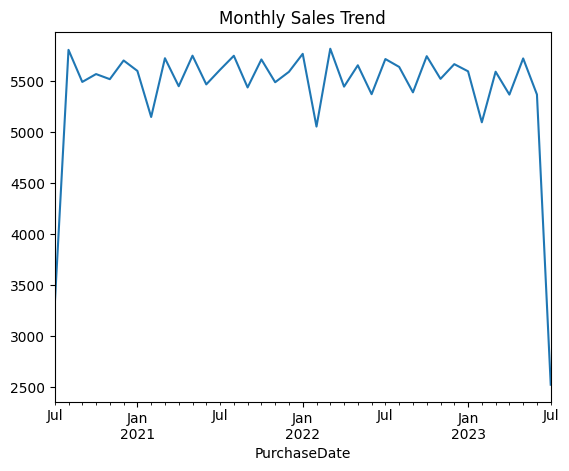

8.080070269790927

In [20]:
# Check the sales trend over time

df['PurchaseDate'] = pd.to_datetime(df['PurchaseDate'])
monthly_sales = df.resample('M', on='PurchaseDate').size()
monthly_sales.plot(title = 'Monthly Sales Trend')
plt.show()

# Total Revenue and Profit Margins
total_revenue = df['Profit'].sum()
total_cost = df['ProductCost'].sum()
profit_margin = (total_revenue / total_cost) * 100
profit_margin

<Axes: xlabel='AnnualIncome', ylabel='SpendingScore'>

/usr/local/lib/python3.10/dist-packages/IPython/core/events.py:89: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  func(*args, **kwargs)
/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  fig.canvas.print_figure(bytes_io, **kw)


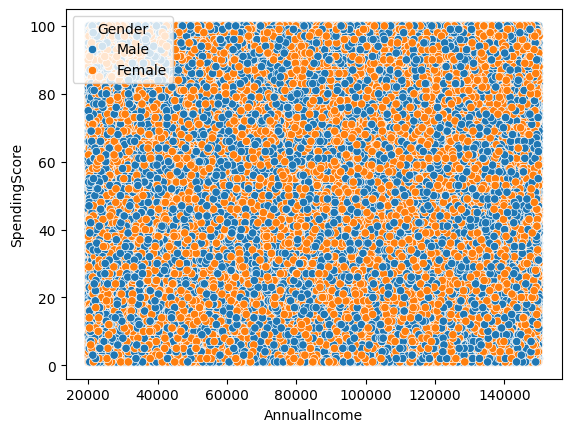

In [21]:
import seaborn as sns

# Spending Patterns
sns.scatterplot(x = 'AnnualIncome', y = 'SpendingScore', data = df, hue = 'Gender')

In [51]:
df['Gender'].value_counts()

Gender
Female    100003
Male       99997
Name: count, dtype: int64

As suspected from the scatterplot above, and confirmed by counter the number of each, the proportion of male to female customers is very close.

In [23]:
# Purchasing Behaviour

average_purchase_amount = df['ProductPrice'].mean()
purchase_frequency = df['CustomerID'].nunique() / df['PurchaseDate'].nunique()
print("The average purchase amount is: ", average_purchase_amount)
print("The purchase frequency is: ", purchase_frequency)

The average purchase amount is:  504.5919277
The purchase frequency is:  182.4817518248175


<Axes: xlabel='FootTraffic', ylabel='Profit'>

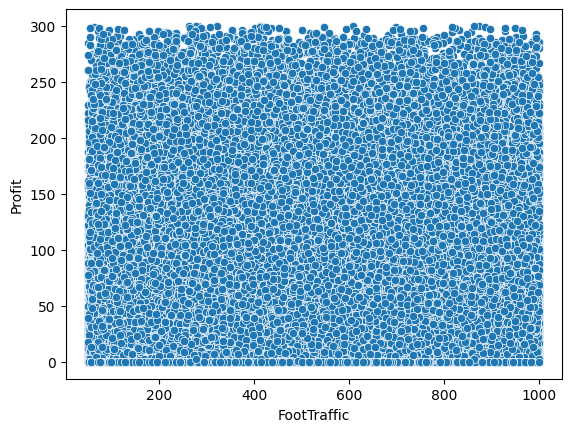

In [24]:
# Foot traffic vs Profit

sns.scatterplot(x = 'FootTraffic', y = 'Profit', data = df)

<Axes: xlabel='InventoryLevel', ylabel='Profit'>

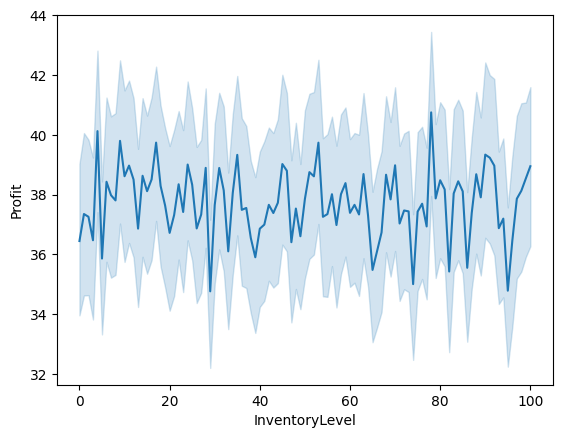

In [25]:
# Inventory levels vs Sales

sns.lineplot( x = 'InventoryLevel', y = 'Profit', data = df)

In [27]:
payment_method_distribution = df['PaymentMethod'].value_counts()
payment_method_distribution.sort_values()

PaymentMethod
Cash               39622
Online Transfer    39910
Credit Card        40062
Debit Card         40144
Mobile Payment     40262
Name: count, dtype: int64

In [30]:
# Profitability analysis

profitability_by_category = df.groupby('ProductCategory')['Profit'].mean()
profitability_by_category.sort_values()

ProductCategory
Electronics        36.849661
Health & Beauty    37.439458
Groceries          37.529894
Home & Kitchen     37.944749
Clothing           38.191758
Books              38.382028
Name: Profit, dtype: float64

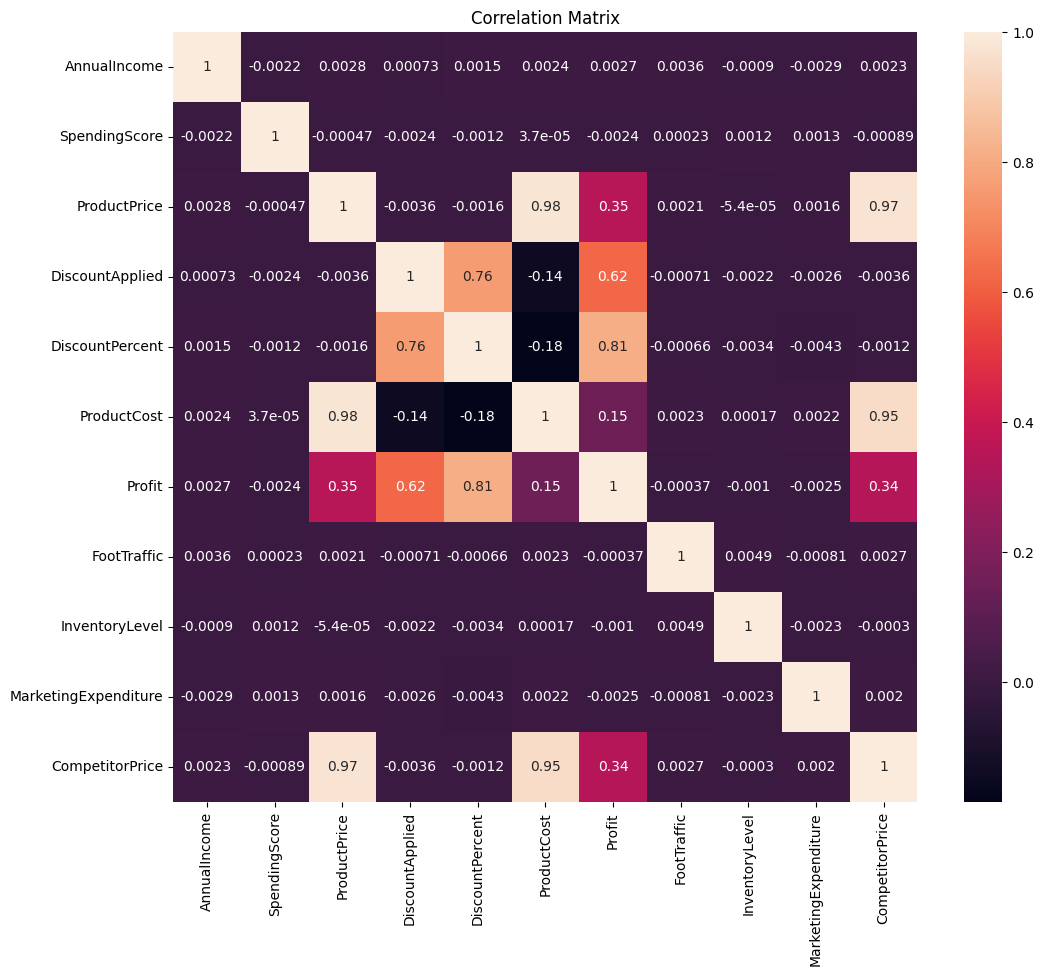

In [36]:
# Correlation heatmap

correlation_df = df[['AnnualIncome', 'SpendingScore', 'ProductPrice', 'DiscountApplied',
                    'DiscountPercent', 'ProductCost', 'Profit', 'FootTraffic',
                    'InventoryLevel', 'MarketingExpenditure', 'CompetitorPrice']]
correlation_matrix = correlation_df.corr()

plt.figure(figsize=(12, 10))  # Adjust the width and height as needed

sns.heatmap(correlation_matrix, annot=True)

# Add title
plt.title('Correlation Matrix')

# Display the plot
plt.show()

The correation matrix above shoes the level of crrelation between the numerical columns. The deeper the color, the less the correlation and the lighter the colour, the more the correlation.

Hence, product Price and competitor price, Product cost and competitor price, are highly correlated.

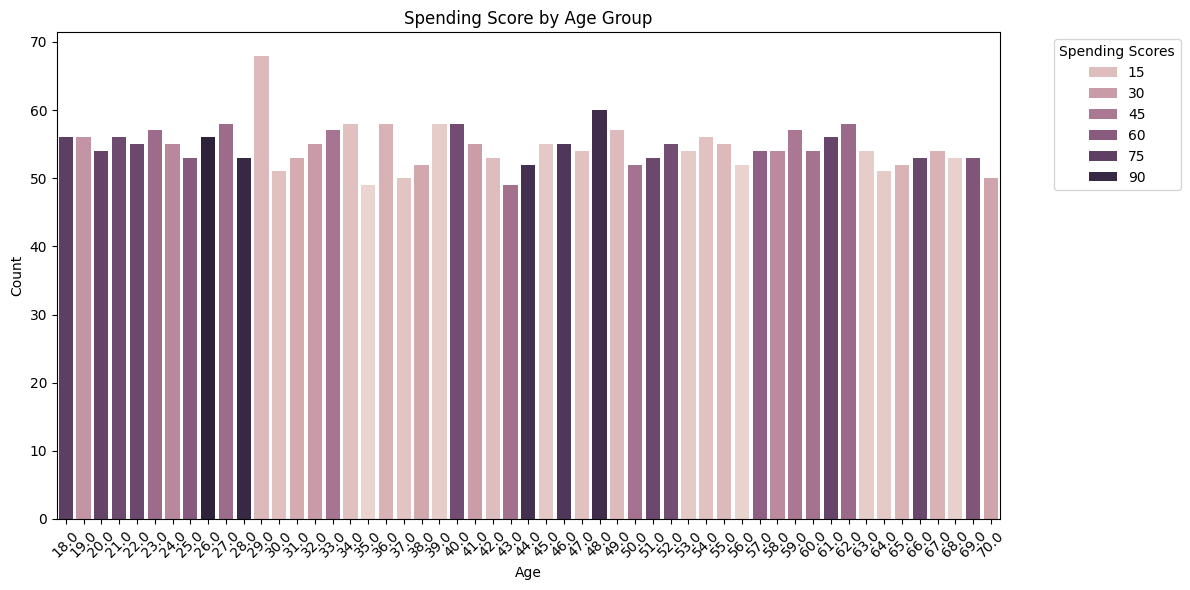

In [39]:
# PLotting Age by the Spending Score in the data
# Grouping the data by 'Age' and 'Spending Score', and then counting the occurrences


spending_score_by_age = df.groupby(['Age', 'SpendingScore']).size().reset_index()
spending_by_age = spending_score_by_age.loc[spending_score_by_age.groupby('Age')[0].idxmax()]


plt.figure(figsize=(12, 6))
sns.barplot(x='Age', y=spending_score_by_age[0], hue='SpendingScore', data=spending_by_age)
plt.title('Spending Score by Age Group')
plt.xlabel('Age')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.legend(title='Spending Scores', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()

<ipython-input-42-050fe4d381a6>:4: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(x='DiscountApplied', y='SpendingScore', data=df, estimator=np.median, ci=None)


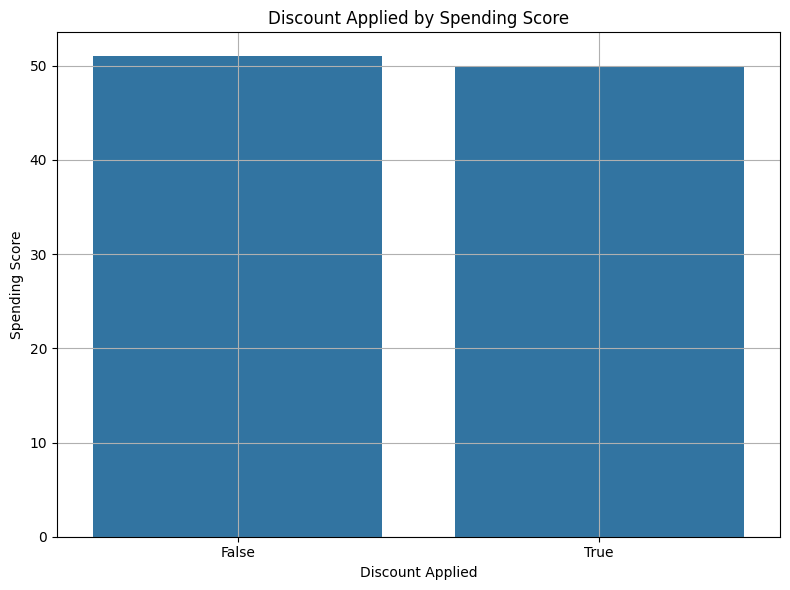

In [42]:
# plot to find out if there is a relationship between promo and sales increase but the plot shows none

plt.figure(figsize=(8, 6))
sns.barplot(x='DiscountApplied', y='SpendingScore', data=df, estimator=np.median, ci=None)
plt.title('Discount Applied by Spending Score')
plt.xlabel('Discount Applied')
plt.ylabel('Spending Score')
plt.grid(True)
plt.tight_layout()
plt.show()

In [43]:
# Grouping the data by 'Location' and calculating summary statistics

location_review_stats = df.groupby('StoreLocation')['SpendingScore'].describe()
location_review_stats

,count,mean,std,min,25%,50%,75%,max
StoreLocation,,,,,,,,
Chicago,19977.0,50.035491,28.850690,1.0,25.0,50.0,75.0,100.0
Dallas,19950.0,50.424762,28.769984,1.0,25.0,50.0,75.0,100.0
Houston,20017.0,50.334865,28.916417,1.0,25.0,50.0,75.0,100.0
Los Angeles,20100.0,50.447413,28.891545,1.0,25.0,50.0,76.0,100.0
New York,19915.0,50.467135,28.916403,1.0,25.0,50.0,75.0,100.0
Philadelphia,19853.0,50.590641,28.759629,1.0,26.0,51.0,75.0,100.0
Phoenix,20109.0,50.447959,28.874130,1.0,25.0,50.0,75.0,100.0
San Antonio,19962.0,50.540978,28.994725,1.0,25.0,50.0,76.0,100.0
San Diego,20074.0,50.214755,28.807709,1.0,25.0,50.0,75.0,100.0


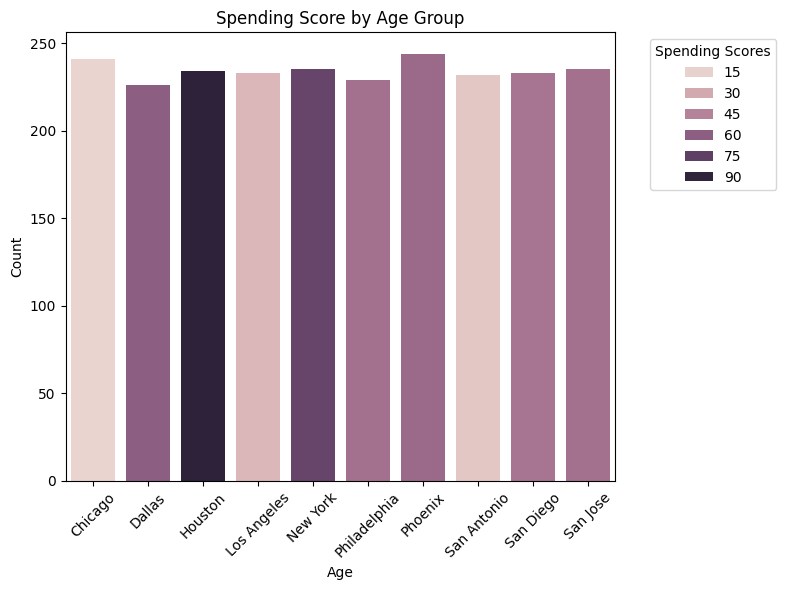

In [47]:
# PLotting Age by the most item purchased for each age in the data
# Grouping the data by 'Age' and 'Item Purchased', and then counting the occurrences

# age_item_counts = df.groupby(['Age', 'SpendingScore']).size().reset_index()
spending_score_by_age = df.groupby(['StoreLocation', 'SpendingScore']).size().reset_index()
spending_by_age = spending_score_by_age.loc[spending_score_by_age.groupby('StoreLocation')[0].idxmax()] # Finding the most purchased item for each age group
#most_purchased_by_age = spending_score_by_age.loc[spending_score_by_age.groupby('Age')[0].idxmax()]

plt.figure(figsize=(8, 6))
sns.barplot(x='StoreLocation', y=spending_score_by_age[0], hue='SpendingScore', data=spending_by_age)
plt.title('Spending Score by Age Group')
plt.xlabel('Age')
plt.ylabel('Count')
plt.xticks(rotation=45)  # Rotate x-axis labels for better readability
plt.legend(title='Spending Scores', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()